# Student Grade Prediction

Objective: Predict the final grade of Portuguese high school students.

About the Dataset
### Content:
The dataset is sourced from the UCL Machine Learning Repository. https://www.kaggle.com/datasets/dipam7/student-grade-prediction?select=student-mat.csv.

### Source:
Paulo Cortez, University of Minho, Guimarães, Portugal. http://www3.dsi.uminho.pt/pcortez

### Dataset Information:
This dataset explores student achievement in secondary education across two Portuguese schools. The attributes include student grades as well as demographic, social, and school-related features, collected through school reports and questionnaires. Two datasets are provided, corresponding to performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).

## 1. Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing Data

### 2.1 Downloding Data

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dipam7/student-grade-prediction")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/mamadousaidoucherifdiallo/.cache/kagglehub/datasets/dipam7/student-grade-prediction/versions/1


### 2.2 Loading Data

In [4]:
df = pd.read_csv(f"{path}/student-mat.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 3. Data Preprocessing

In [5]:
# Missing Values
print("Missing Values: ", df.isnull().sum().sum())
# Duplicated Values
print("Duplicated Values: ", df.duplicated().sum())


Missing Values:  0
Duplicated Values:  0


In [6]:
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## 4. Univariate Analysis




In [7]:
# Numerical Variables
numerical_columns = df.select_dtypes(include=['int64']).columns
print(numerical_columns)

# Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

print(len(numerical_columns) + len(categorical_columns))


Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')
Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
33


### 4.1 Histograms with subplots of numerical variables

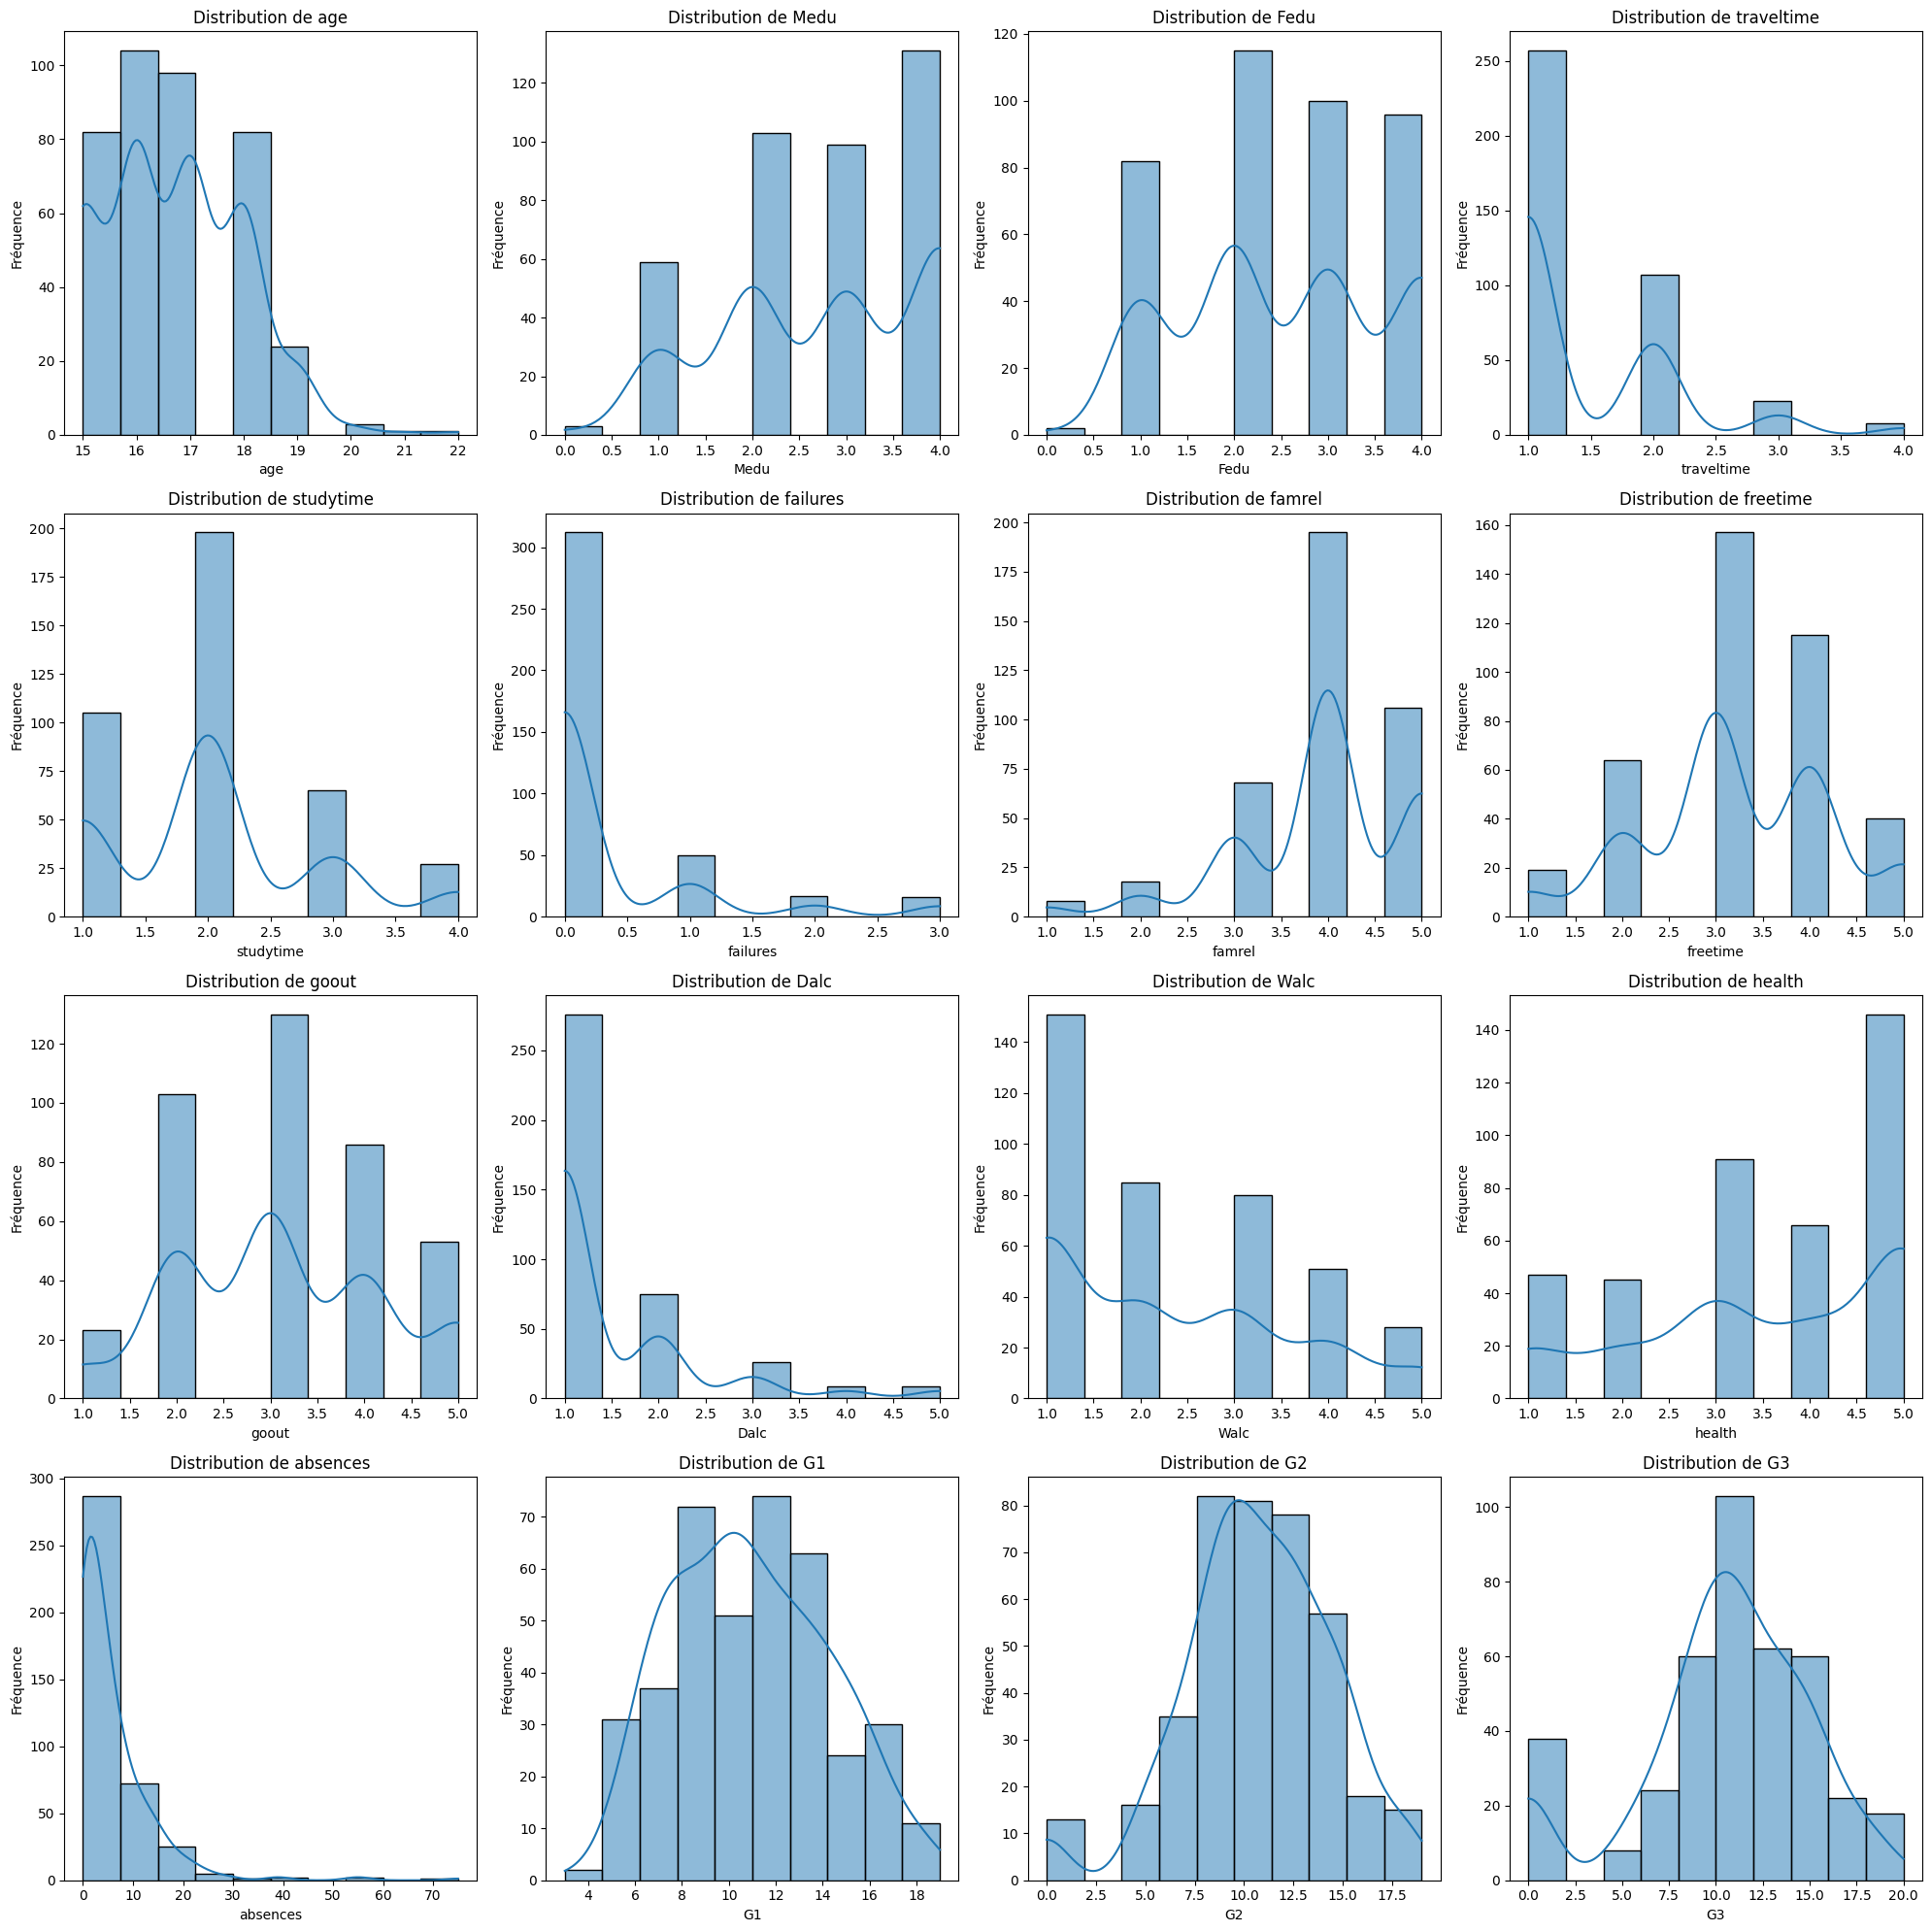

In [12]:
#4.1 Numerical Variables avec subplots

def plot_histograms_with_subplots(df, columns, n_cols=4, bins=10):
   
    # Calculate number of rows needed
    n_rows = (len(columns) + n_cols - 1) // n_cols
    
    # Create figure
    plt.figure(figsize=(20, 5*n_rows))
    
    # Create subplots
    for i, col in enumerate(columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data=df, x=col, kde=True,  bins=bins)
        plt.title(f'Distribution de {col}')
        plt.xlabel(col)
        plt.ylabel('Fréquence')
    
    plt.tight_layout()
    plt.show()

# Using the function
plot_histograms_with_subplots(df, numerical_columns)

Analysis of Numerical Variables Distributions

1. Demographic Characteristics:
   - Age: Distribution concentrated between 15 and 18 years, with a median around 16 years.
     Positive skewness observed with few isolated cases of students over 20 years old.

2. Parental Educational Background:
   - Mother's Education (Medu): Multimodal distribution with pronounced peak at 4 (higher education level).
     Distribution indicates generally high education levels with very few cases of no education.
   - Father's Education (Fedu): Similar distribution but with main peak at 2,
     suggesting medium to high education level for majority of fathers.

3. Logistical and Study Factors:
   - Travel Time (traveltime): Strong right-skewed distribution
     - Majority of students: less than 30 minutes commute
     - Very small proportion: more than one hour commute
   
   - Study Time (studytime): Multimodal distribution dominated by level 2
     - Main peak: 2-5 hours of study per week
     - Second group: less than 2 hours
     - Minority groups: 5-10 hours and more than 10 hours

4. Academic Performance:
   - Failures: Strong right-skewed distribution
     - Majority: no failures
     - Decreasing minority: one or more failures

5. Social and Family Factors:
   - Family Relations (famrel): Negative skewed distribution
     - Tendency towards positive family relationships (high scores)
   
   - Free Time (freetime): Relatively symmetric distribution
     - Balanced distribution with slight tendency towards medium to high levels
   
   - Going Out (goout): Distribution centered around 3
     - Moderate frequency of outings for majority
     - Small group with very few social outings

6. Alcohol Consumption:
   - Workday (Dalc): Strong right-skewed distribution
     - Very low consumption for vast majority
   
   - Weekend (Walc): More spread out distribution
     - Tendency towards higher consumption than during weekdays
     - Greater variation in behaviors

7. Health and Attendance:
   - Health: Slightly negative-skewed distribution
     - Higher concentration of scores towards good health status
     - Peak around 4-5 indicating majority of students report above-average health
     - Smaller proportion reporting poor health
   
   - Absences: Strong right-skewed distribution
     - Majority: few absences
     - Some extreme cases with numerous absences

Implications for Analysis:
- Most variables show skewed distributions
- Presence of extreme values in several variables

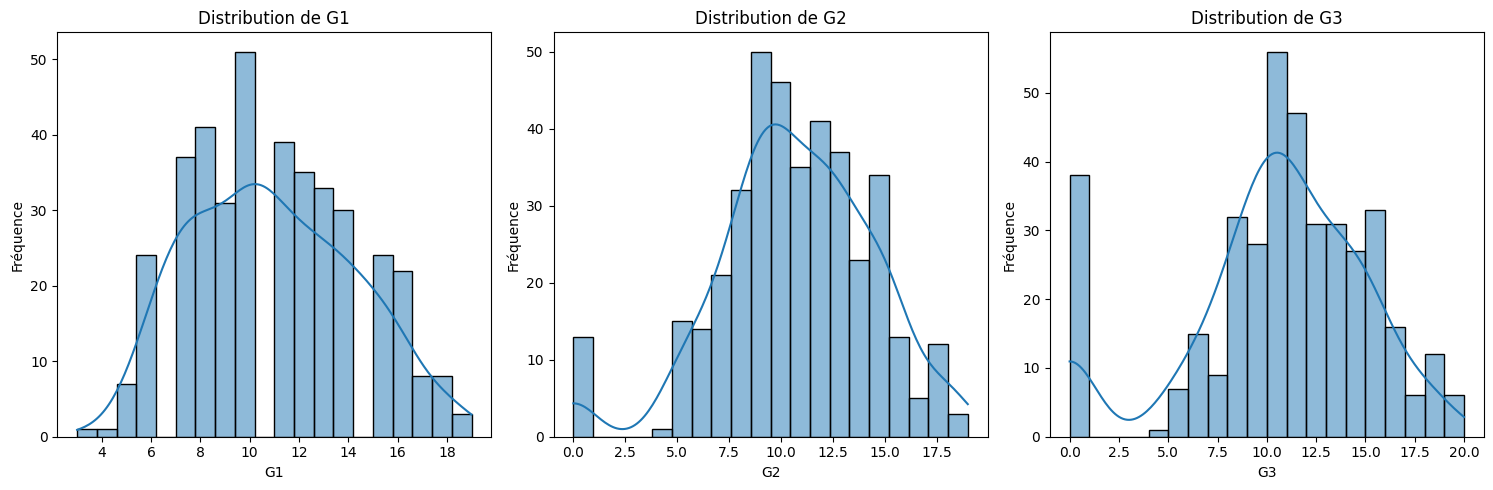

In [16]:
# Grades G1, G2, G3
plot_histograms_with_subplots(df, ['G1', 'G2', 'G3'], bins=20)

8. Grade Distribution Analysis:
   - First Period Grade (G1):
     - Multimodal distribution with four distinct groups:
       * Small group with low performance (scores between 3-6)
       * Largest concentration with scores between 7-10 (highest peak)
       * Second major group with scores between 11-14 (slightly smaller than previous group)
       * Small high-achieving group with scores above 15
     - Shows clear segmentation of student performance levels

   - Second Period Grade (G2):
     - Approximately symmetric distribution with some notable features:
       * Main peak centered around score of 9
       * Small isolated group with very low scores (near 0)
       * More balanced distribution compared to G1
     - Suggests potential normalization of performance as semester progresses

   - Final Grade (G3):
     - Similar overall pattern to G2 but with two key differences:
       * Main peak centered around score of 10 (higher than G2)
       * Significantly larger peak for very low scores (near 0) compared to G2
       * Rest of distribution similar to G2
     - This increased concentration of very low scores could indicate:
       * Possible increase in student dropouts or disengagement
       * More severe failing grades in final assessment
       * Potential polarization between successful and struggling students

Key Observations:
- Evolution from clearly segmented performance groups in G1 to more normalized distribution in G2 and G3
- Concerning increase in the proportion of very low scores in G3
- Slight upward shift in central tendency from G2 to G3 for passing students

### 4.2 Boxplots with subplots of numerical variables

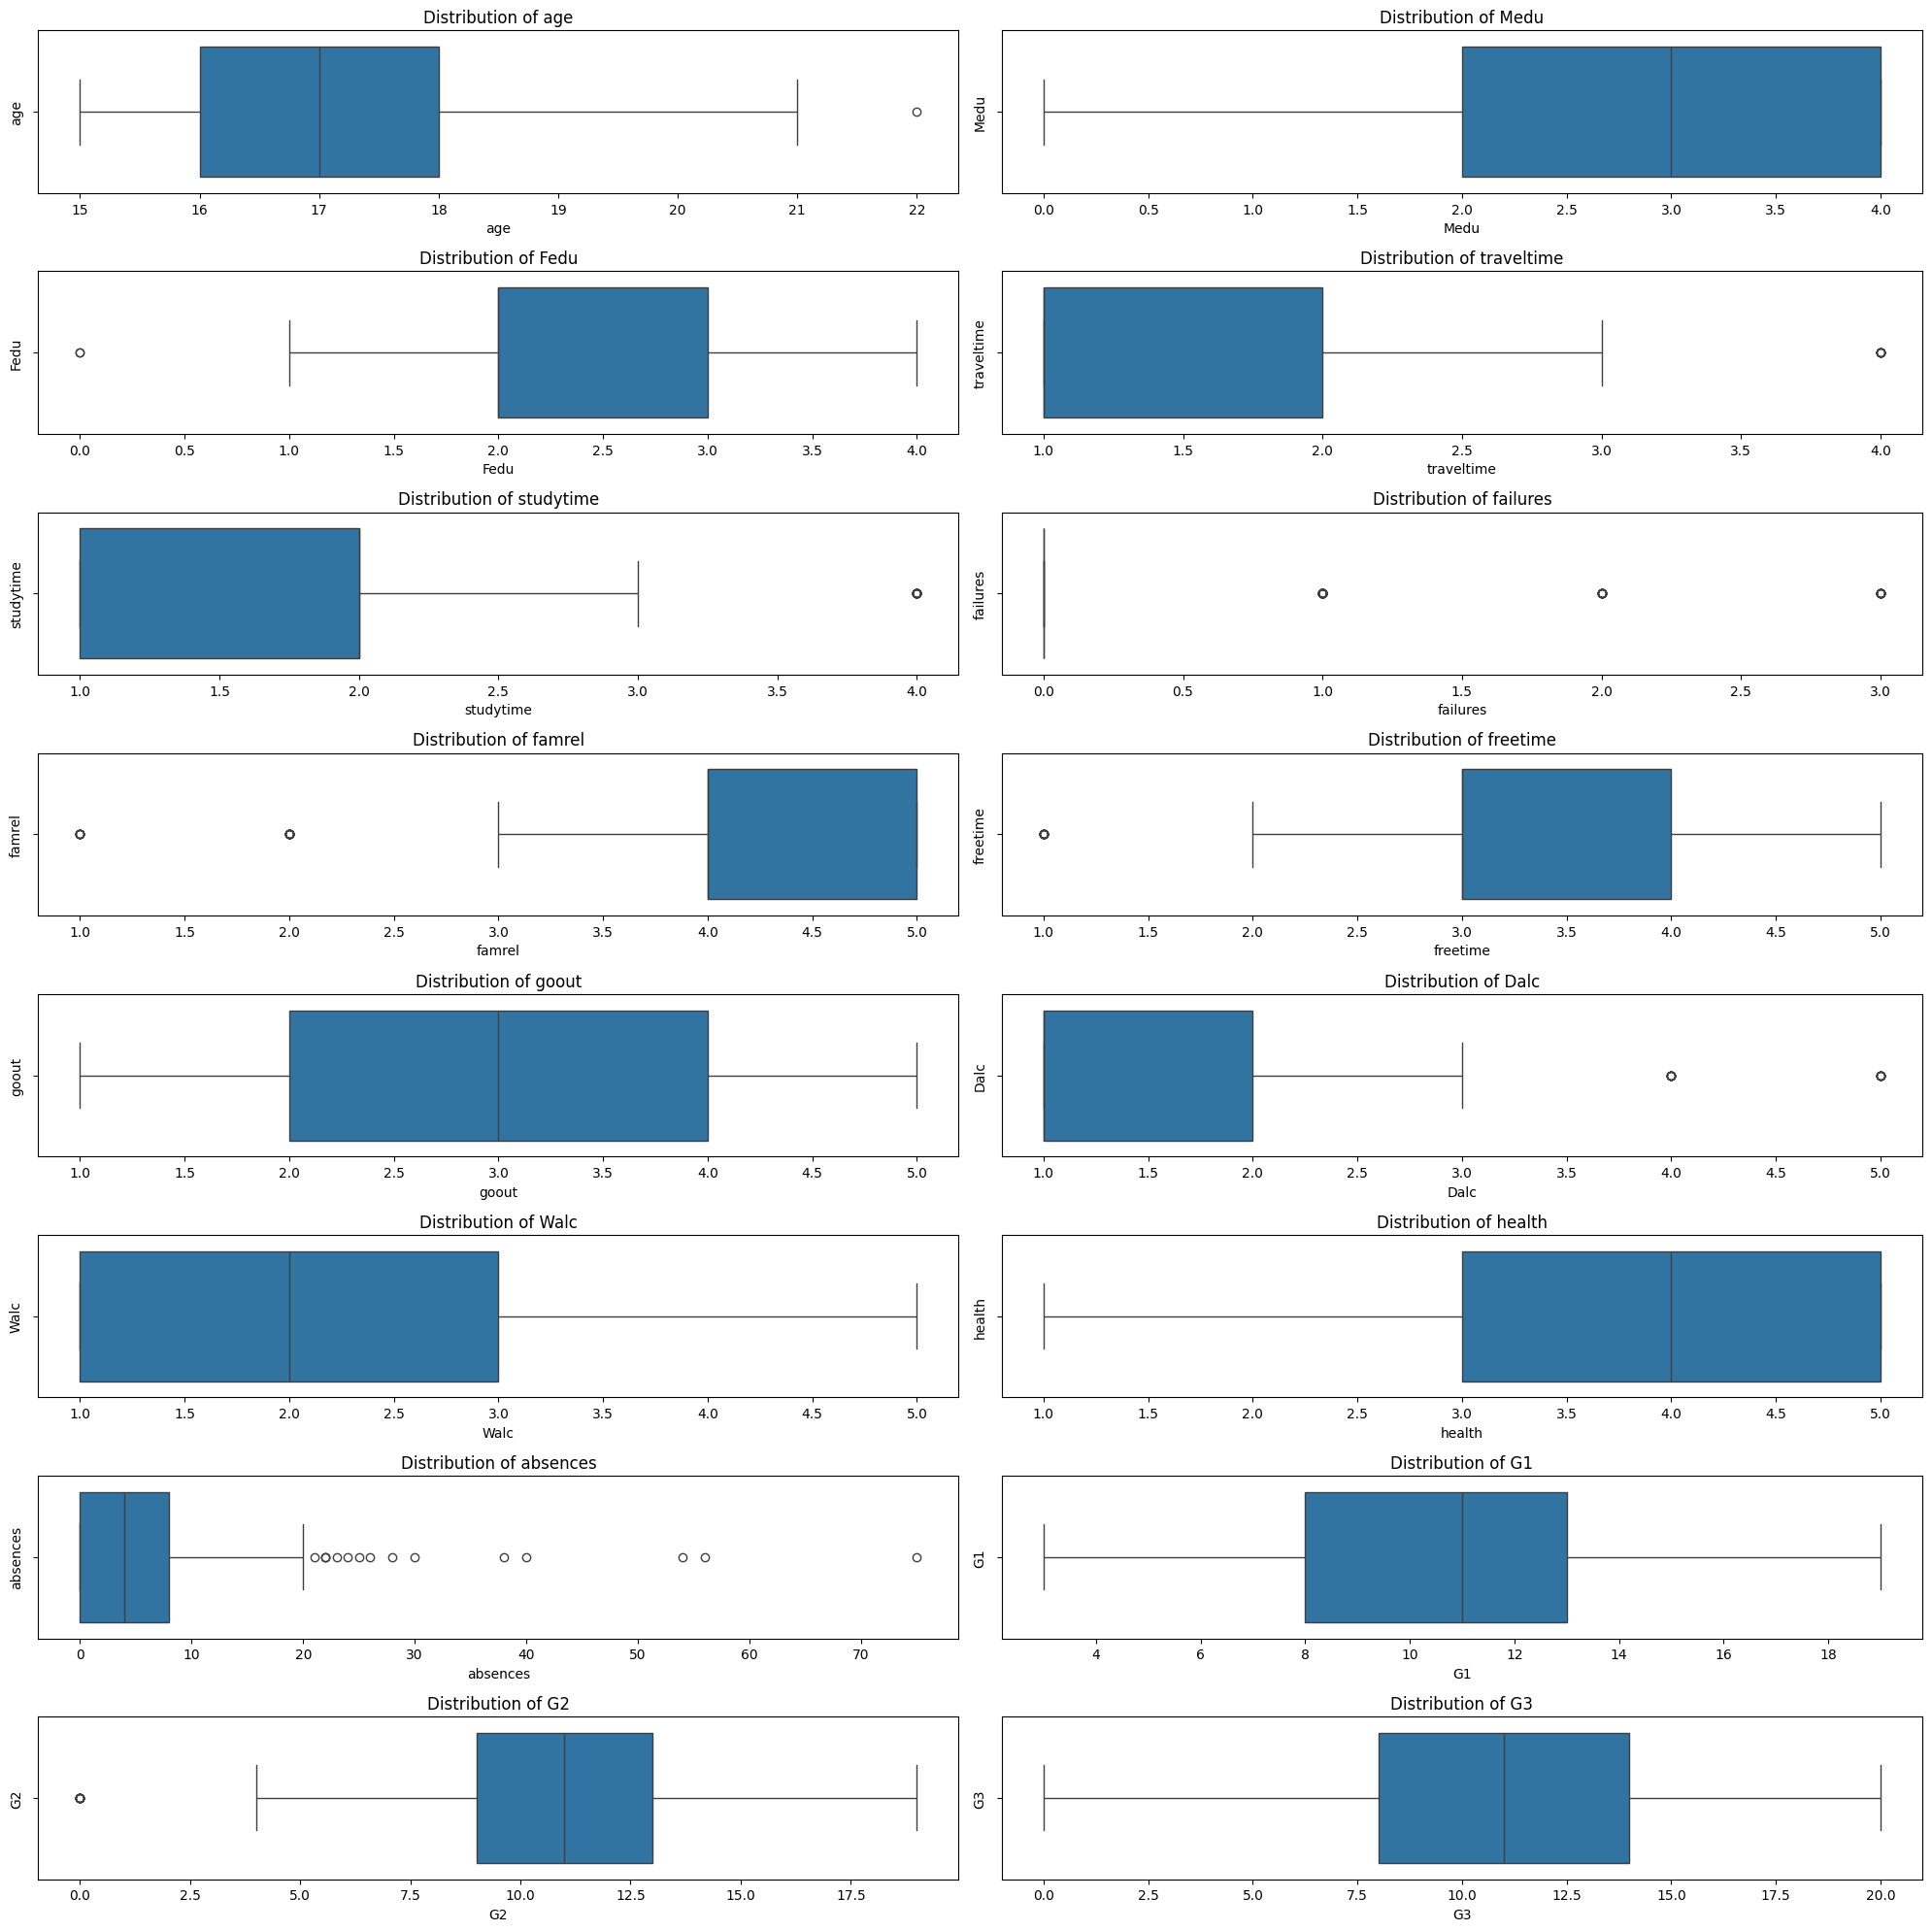

In [20]:
def plot_boxplots_with_subplots(df, columns, n_cols=4):
    """Creates boxplots with subplots for specified variables.
    
    Args:
        df (pandas.DataFrame): DataFrame containing the data
        columns (list): List of columns to visualize
        n_cols (int): Number of columns in the subplot grid (default: 4)
    """
    # Calculate number of rows needed
    n_rows = (len(columns) + n_cols - 1) // n_cols
    
    # Create figure
    plt.figure(figsize=(20, 5*n_rows))
    
    # Create subplots
    for i, col in enumerate(columns, 1):
        plt.subplot(8, 2, i)
        sns.boxplot(data=df, x=col)
        plt.title(f'Distribution of {col}')
        plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()

# Using the function
plot_boxplots_with_subplots(df, numerical_columns)

Analysis of Numerical Variables Boxplots

1. Demographic Characteristics  

- The age boxplot analysis reveals a highly concentrated distribution, with 75% of students between 15 and 18 years old, which corresponds to typical secondary school age. The distribution shows positive skewness (right-skewed), with a relatively small interquartile range of 2 years, indicating a homogeneous age population. The total data range is 6 years, from 15 to 21 years, with one notable outlier at 22 years that stands significantly apart from the main distribution. The upper whisker length of 7 years highlights the presence of a few older students, although these remain exceptional in the sample.

2. Parental Education Analysis:   
- The boxplot analysis of mothers' education levels shows a left-skewed distribution, with 75% of mothers having achieved at least a 5th to 9th grade education level. The distribution is particularly notable as the third quartile (Q3) coincides with the maximum value, indicating a significant concentration of mothers with higher education levels. The scale ranges from 0 (none) to 4 (higher education), with most mothers demonstrating substantial educational attainment.

- The fathers' education distribution reveals that 75% of fathers have achieved either a 5th to 9th grade level (2) or secondary education (3). The boxplot shows an interesting pattern where the median coincides with either the first or third quartile, suggesting a strong concentration at certain education levels. While the main distribution ranges from primary education (1) to higher education (4), there is a notable outlier at level 0 (no education). This indicates that while most fathers have some form of education, there are exceptional cases of no formal education.

3. Logistical and Study Factors:
- Travel Time:
The boxplot analysis of travel time reveals that 75% of students have a commute of either less than 15 minutes (1) or between 15 to 30 minutes (2). The distribution shows an interesting pattern where the median coincides with either Q1 or Q3, indicating a strong concentration at specific travel time categories. While the main distribution ranges from category 1 to 3 (up to 1 hour), there are outliers at category 4 (more than 1 hour), representing students with exceptionally long commutes.

- Study Time:
The study time distribution mirrors the pattern observed in travel time. The majority (75%) of students dedicate either less than 2 hours (1) or 2 to 5 hours (2) to weekly study. Similarly to travel time, the median coincides with one of the quartiles, suggesting a clustering of students around particular study time categories. The main distribution spans from category 1 to 3 (up to 10 hours), with outliers at category 4 (more than 10 hours), representing students who dedicate exceptional amounts of time to studying.

4. Academic Performance - Failures:

- The failures boxplot exhibits an extremely concentrated distribution where all statistical measures (minimum, Q1, median, Q3, and maximum) coincide at zero, creating a collapsed box at this value. This indicates that most students have no previous failures. The distribution only shows variation through outliers at values 1, 2, and 3, representing students with one, two, or three failures respectively. This pattern strongly suggests that academic failure is exceptional in the student population, with the vast majority maintaining successful academic progression.

5. Social and Family Factors:

- Family Relationships (famrel):
The boxplot reveals that 75% of students report high-quality family relationships (levels 4 or 5 - 'good' to 'excellent'). The distribution shows a notable concentration where the median coincides with either Q1 or Q3, and the maximum merges with Q3, indicating a strong skew toward positive family dynamics. Outliers at levels 1 and 2 represent exceptional cases of poor family relationships.

- Free Time (freetime):
Students' free time distribution shows that 75% report moderate to high levels (3 to 4) of free time after school. The median coincides with either Q1 or Q3, suggesting clustering around specific values. While the main distribution ranges from 2 to 5, there is an outlier at level 1 (very low free time), indicating that extremely limited free time is unusual in the student population.

- Going Out (goout):
The frequency of going out with friends displays a remarkably symmetric distribution centered around level 3 (moderate frequency). Unlike the other social factors, this variable shows no outliers, suggesting that socializing patterns among students follow a more regular, bell-shaped distribution without extreme cases.

6. Alcohol Consumption:

- Workday Alcohol Consumption (Dalc):
The boxplot analysis shows that 75% of students report very low to low alcohol consumption (levels 1-2) during workdays. The distribution is right-skewed, with the median coinciding with either Q1 or Q3, indicating strong clustering at lower consumption levels. While the main distribution ranges from 1 to 3, outliers at levels 4 and 5 represent exceptional cases of high workday alcohol consumption.

- Weekend Alcohol Consumption (Walc):
Weekend consumption shows a different pattern, though still right-skewed. The distribution is more spread out with no outliers, suggesting that higher consumption levels are more common during weekends. The median sits at level 2, with Q1 at 1 and Q3 at 3, indicating a wider range of drinking behaviors during weekends compared to workdays.

7. Health and Attendance:

- Health Status:
The boxplot reveals a left-skewed distribution of student health status, with a median of 4 indicating generally good health among the population. The distribution ranges from Q1 at 3 to Q3 (which coincides with the maximum) at 5, showing no outliers. This pattern suggests that most students report good to excellent health, with a concentration towards the higher end of the scale.

- Absences:
The attendance pattern shows a strongly right-skewed distribution with a notably small interquartile range. The minimum value coincides with Q1, indicating that a significant portion of students have very few or no absences. While the main distribution (without outliers) ranges from 0 to approximately 20 absences, there are multiple outliers beyond this range. The compressed nature of the box portion suggests that regular attendance is the norm, with excessive absences being exceptional.

8. Academic Grades Analysis (G1, G2, G3):

- First Period Grade (G1):
The boxplot shows a slightly left-skewed distribution with no outliers. The interquartile range spans from 8 to 13, with a median of 11, representing a fairly balanced spread of initial grades. The absence of outliers suggests that extreme performances, either very high or very low, are part of the normal grade distribution in the first period.

- Second Period Grade (G2):
The distribution appears symmetric around a median of approximately 11, similar to G1. However, there is a notable outlier at 0, possibly representing students who dropped out or failed to complete the second period. Excluding this outlier, the distribution shows a regular pattern of academic performance.
- Final Grade (G3):
The final grades show a slightly left-skewed distribution centered around a median of 11. Like G1, there are no outliers, indicating that extreme grades are part of the normal distribution pattern. This suggests a stabilization of performance by the end of the academic period.
